In [1]:
# AA228/CS238: DMU 

# BayesNet Family Cancer inference

# So far in this course you have learned a lot of theory but have not yet put it to a very specific application. Lets do so! 

# Lets use a single problem the entire way. Lets say we are datascientists and we want to estimate the change in probability of knowing if a person will have cancer given that someone in their family has had cancer. If the person has a high probability, we may want to put them on some drug that will help reduce their chances or we may want to schedule them for visits every 3 months so we can catch it quickly. 
# But how can we try to estimate this? 

# To start, please install:
# !pip install pgmpy networkx matplotlib pydot


In [1]:
# 2. Representation of a joint distribution with a BayesNet:

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt
import networkx as nx



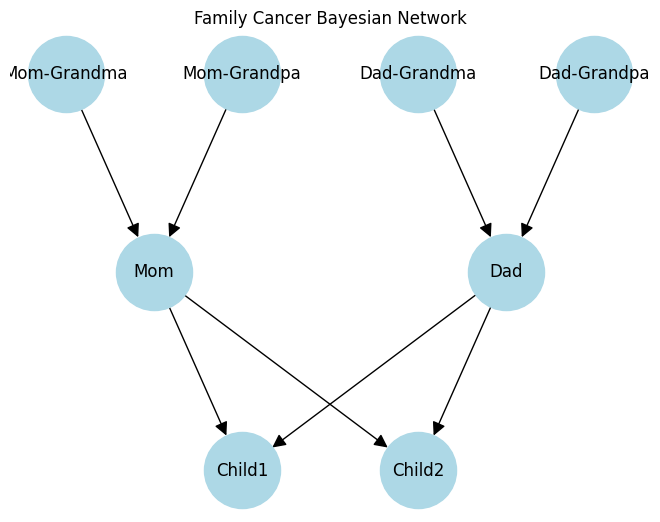

In [2]:

# First lets represent the joint distribution as a directed graph below.

# Lets assume we have some data on the conditional probability of each having cancer observing that the others may or may not have cancer. 

# We must write a probabilistic graphical model of a family that has a:
# mom-grandma, mom-grandpa, dad-grandma, dad-grandpa, mom, dad, child1, child2. 

# And we want to represent this as a graph with edges and nodes (per person). We assume that the lineage is a good way to represent the graph.


# Define the Bayesian Network structure
model = BayesianNetwork([
    ('Mom-Grandma', 'Mom'),
    ('Mom-Grandpa', 'Mom'),
    ('Dad-Grandma', 'Dad'),
    ('Dad-Grandpa', 'Dad'),
    ('Mom', 'Child1'),
    ('Dad', 'Child1'),
    ('Mom', 'Child2'),
    ('Dad', 'Child2'),
])

# Define CPDs (Conditional Probability Distributions)
# Grandparents' prior probabilities of having cancer
prior_on_cancer = 0.5

cpd_MG = TabularCPD(variable='Mom-Grandma', variable_card=2, values=[[prior_on_cancer], 
                                                                     [1-prior_on_cancer]])

cpd_MP = TabularCPD(variable='Mom-Grandpa', variable_card=2, values=[[prior_on_cancer], 
                                                                     [1-prior_on_cancer]])

cpd_DG = TabularCPD(variable='Dad-Grandma', variable_card=2, values=[[prior_on_cancer], 
                                                                     [1-prior_on_cancer]])

cpd_DP = TabularCPD(variable='Dad-Grandpa', variable_card=2, values=[[prior_on_cancer], 
                                                                     [1-prior_on_cancer]])

# Lets explain this a bit, first, we name the node. Then we assign the variable cardinality (variable_card) to be 2 because I can have cancer or not. Then we assign the prior probability that we have cancer. We can get these from population statistics.   

cancer_probability_given_both_parents_have_cancer = 0.9999
cancer_probability_given_one_parent_has_cancer = 0.7
cancer_probability_given_no_parent_has_cancer = 0.01
# Mom's probability of having cancer given her parents' cancer status
cpd_M = TabularCPD(variable='Mom', variable_card=2,
                   evidence=['Mom-Grandma', 'Mom-Grandpa'], evidence_card=[2, 2],
                   values=[
                       [1-cancer_probability_given_no_parent_has_cancer, 1-cancer_probability_given_one_parent_has_cancer, 1-cancer_probability_given_one_parent_has_cancer, 1-cancer_probability_given_both_parents_have_cancer],  # No Cancer
                       [cancer_probability_given_no_parent_has_cancer, cancer_probability_given_one_parent_has_cancer, cancer_probability_given_one_parent_has_cancer, cancer_probability_given_both_parents_have_cancer],  # Cancer
                   ])

# Now lets explain this a bit, first, we assign the variable cardinality (variable_card) to be 2 because again I can have cancer or not. 
# Then we assign the conditional probability that we have cancer given what the mom's parents have. They each could have cancer or not, so there are 4 possible "assignments" for the parents (cancer+cancer, cancer + no cancer, no cancer+cancer, no cancer + no cancer).

# Dad's probability of having cancer given his parents' cancer status
cpd_D = TabularCPD(variable='Dad', variable_card=2,
                   evidence=['Dad-Grandma', 'Dad-Grandpa'], evidence_card=[2, 2],
                   values=[
                       [1-cancer_probability_given_no_parent_has_cancer, 1-cancer_probability_given_one_parent_has_cancer, 1-cancer_probability_given_one_parent_has_cancer, 1-cancer_probability_given_one_parent_has_cancer],  # No Cancer
                       [cancer_probability_given_no_parent_has_cancer, cancer_probability_given_one_parent_has_cancer, cancer_probability_given_one_parent_has_cancer, cancer_probability_given_one_parent_has_cancer],  # Cancer
                   ])

# Children's probability of having cancer given their parents' cancer status
cpd_C1 = TabularCPD(variable='Child1', variable_card=2,
                    evidence=['Mom', 'Dad'], evidence_card=[2, 2],
                   values=[
                       [1-cancer_probability_given_no_parent_has_cancer, 1-cancer_probability_given_one_parent_has_cancer, 1-cancer_probability_given_one_parent_has_cancer, 1-cancer_probability_given_one_parent_has_cancer],  # No Cancer
                       [cancer_probability_given_no_parent_has_cancer, cancer_probability_given_one_parent_has_cancer, cancer_probability_given_one_parent_has_cancer, cancer_probability_given_one_parent_has_cancer],  # Cancer
                   ])

cpd_C2 = TabularCPD(variable='Child2', variable_card=2,
                    evidence=['Mom', 'Dad'], evidence_card=[2, 2],
                   values=[
                       [1-cancer_probability_given_no_parent_has_cancer, 1-cancer_probability_given_one_parent_has_cancer, 1-cancer_probability_given_one_parent_has_cancer, 1-cancer_probability_given_one_parent_has_cancer],  # No Cancer
                       [cancer_probability_given_no_parent_has_cancer, cancer_probability_given_one_parent_has_cancer, cancer_probability_given_one_parent_has_cancer, cancer_probability_given_one_parent_has_cancer],  # Cancer
                   ])

# Add CPDs to the model
model.add_cpds(cpd_MG, cpd_MP, cpd_DG, cpd_DP, cpd_M, cpd_D, cpd_C1, cpd_C2)

# Check if the model is valid
assert model.check_model()

# Visualize the Bayesian Network using networkx

# Create a directed graph from the model
G = nx.DiGraph()

# Add nodes and edges from the Bayesian network
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())
# Manually specify positions for a hierarchical layout
pos = {
    'Mom-Grandma': (1, 3),
    'Mom-Grandpa': (3, 3),
    'Dad-Grandma': (5, 3),
    'Dad-Grandpa': (7, 3),
    'Mom': (2, 2),
    'Dad': (6, 2),
    'Child1': (3, 1),
    'Child2': (5, 1),
}

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', arrowsize=20)
plt.title("Family Cancer Bayesian Network")
plt.show()


In [3]:
# 2. Inference:

# Next, now that we have our graph, lets ask the graph a question! 
# Given observing that mom-grandma has cancer, determine the change in probability that child1 will have cancer observing that mom-grandma has cancer?

from pgmpy.inference import VariableElimination

# Perform inference using Variable Elimination
infer = VariableElimination(model)

prior_prob = infer.query(variables=['Child1'], evidence={})
print("Prior Probability of Child1 having cancer with no observation:")
print(prior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 1})  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe Mom-Grandma has cancer:")
print(posterior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 0})  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe Mom-Grandma does NOT have cancer:")
print(posterior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 1, 'Dad-Grandma': 1, 'Mom-Grandpa': 1,'Dad-Grandpa': 1  })  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe all 4 grandparents have cancer:")
print(posterior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 0, 'Dad-Grandma': 0, 'Mom-Grandpa': 0,'Dad-Grandpa': 0  })  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe all 4 grandparents don't have cancer:")
print(posterior_prob)


Prior Probability of Child1 having cancer with no observation:
+-----------+---------------+
| Child1    |   phi(Child1) |
+===========+===============+
| Child1(0) |        0.4296 |
+-----------+---------------+
| Child1(1) |        0.5704 |
+-----------+---------------+

Posterior Probability of Child1 having cancer given we observe Mom-Grandma has cancer:
+-----------+---------------+
| Child1    |   phi(Child1) |
+===========+===============+
| Child1(0) |        0.3489 |
+-----------+---------------+
| Child1(1) |        0.6511 |
+-----------+---------------+

Posterior Probability of Child1 having cancer given we observe Mom-Grandma does NOT have cancer:
+-----------+---------------+
| Child1    |   phi(Child1) |
+===========+===============+
| Child1(0) |        0.5103 |
+-----------+---------------+
| Child1(1) |        0.4897 |
+-----------+---------------+

Posterior Probability of Child1 having cancer given we observe all 4 grandparents have cancer:
+-----------+------------

In [4]:
# as you can see, our probability of Child1 having cancer can range drastically, from 0.02% to 70% by simply observing our grandparents! This meaningfully changes our opinion of whether or not we will get cancer right?


In [5]:
# 3. Parameter Learning:

# Now, where did these conditional probability tables come from? We just made them up! 
# But lets get some data on families around the world over the last 100 years, and and lets estimate these values. 

# First lets generate some fake data. 

import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator


def create_data_set(num_families = 100,
                    true_cancer_probability_given_both_parents_have_cancer = 0.99,
                    true_cancer_probability_given_one_parent_has_cancer = 0.6,
                    true_cancer_probability_given_no_parent_has_cancer = 0.01,
                    true_prior_on_cancer = 0.5):

    data = []
    
    # Grandparents' prior probabilities of having cancer
    prob_MG = [1-true_prior_on_cancer, true_prior_on_cancer]  # [No Cancer, Cancer]
    prob_MP = [1-true_prior_on_cancer, true_prior_on_cancer]
    prob_DG = [1-true_prior_on_cancer, true_prior_on_cancer]
    prob_DP = [1-true_prior_on_cancer, true_prior_on_cancer]
    
    # Mom's probability of having cancer given her parents' cancer status
    cpd_M_values = np.array(
         (
             [1-true_cancer_probability_given_no_parent_has_cancer, 1-true_cancer_probability_given_one_parent_has_cancer, 1-true_cancer_probability_given_one_parent_has_cancer, 1-true_cancer_probability_given_both_parents_have_cancer],  # No Cancer
         [true_cancer_probability_given_no_parent_has_cancer, true_cancer_probability_given_one_parent_has_cancer, true_cancer_probability_given_one_parent_has_cancer, true_cancer_probability_given_both_parents_have_cancer]
    
         ) 
    )

    # Dad's probability of having cancer given his parents' cancer status
    cpd_D_values = np.array(
         (
             [1-true_cancer_probability_given_no_parent_has_cancer, 1-true_cancer_probability_given_one_parent_has_cancer, 1-true_cancer_probability_given_one_parent_has_cancer, 1-true_cancer_probability_given_both_parents_have_cancer],  # No Cancer
         [true_cancer_probability_given_no_parent_has_cancer, true_cancer_probability_given_one_parent_has_cancer, true_cancer_probability_given_one_parent_has_cancer, true_cancer_probability_given_both_parents_have_cancer]
    
         ) 
    )
    
    # Children's probability of having cancer given their parents' cancer status
    cpd_C_values = np.array(
         (
             [1-true_cancer_probability_given_no_parent_has_cancer, 1-true_cancer_probability_given_one_parent_has_cancer, 1-true_cancer_probability_given_one_parent_has_cancer, 1-true_cancer_probability_given_both_parents_have_cancer],  # No Cancer
         [true_cancer_probability_given_no_parent_has_cancer, true_cancer_probability_given_one_parent_has_cancer, true_cancer_probability_given_one_parent_has_cancer, true_cancer_probability_given_both_parents_have_cancer]
    
         ) 
    )
    
    for _ in range(num_families):
        family = {}
        
        # Generate grandparents' cancer status
        family['Mom-Grandma'] = np.random.choice([0,1], p=prob_MG)
        family['Mom-Grandpa'] = np.random.choice([0,1], p=prob_MP)
        family['Dad-Grandma'] = np.random.choice([0,1], p=prob_DG)
        family['Dad-Grandpa'] = np.random.choice([0,1], p=prob_DP)
        
        # Mom's cancer status
        mg = family['Mom-Grandma']
        mp = family['Mom-Grandpa']
        index_M = mg * 2 + mp  # Convert binary states to index (00->0, 01->1, 10->2, 11->3)
        prob_M = cpd_M_values[:, index_M]
        family['Mom'] = np.random.choice([0,1], p=prob_M)
        
        # Dad's cancer status
        dg = family['Dad-Grandma']
        dp = family['Dad-Grandpa']
        index_D = dg * 2 + dp
        prob_D = cpd_D_values[:, index_D]
        family['Dad'] = np.random.choice([0,1], p=prob_D)
        
        # Child1's cancer status
        mom = family['Mom']
        dad = family['Dad']
        index_C = mom * 2 + dad
        prob_C1 = cpd_C_values[:, index_C]
        family['Child1'] = np.random.choice([0,1], p=prob_C1)
        
        # Child2's cancer status
        prob_C2 = cpd_C_values[:, index_C]  # Same as Child1
        family['Child2'] = np.random.choice([0,1], p=prob_C2)
        
        data.append(family)
    
    # Convert to pandas DataFrame
    df = pd.DataFrame(data)
    return df
    
example_dataset = create_data_set(num_families = 10)
print("Here is an example dataset of 10 families in the world, where 0=did not have cancer, 1=did have cancer")
example_dataset

Here is an example dataset of 10 families in the world, where 0=did not have cancer, 1=did have cancer


,Mom-Grandma,Mom-Grandpa,Dad-Grandma,Dad-Grandpa,Mom,Dad,Child1,Child2
0,0,1,0,1,0,1,0,1
1,1,0,0,0,1,0,0,1
2,1,0,1,0,1,1,1,1
3,0,1,1,1,1,1,1,1
4,1,0,1,0,1,1,1,1
5,1,0,0,0,0,0,0,0
6,0,0,1,1,0,1,1,1
7,0,1,1,0,0,1,0,0
8,1,1,1,1,1,1,1,1
9,1,0,0,0,0,0,0,0


In [6]:
# Now lets use this data to estimate these values with MLE:
model.fit(example_dataset, estimator=MaximumLikelihoodEstimator)

# Get the estimated CPDs (conditional probability distributions)
estimated_cpds = model.get_cpds()

# Print the estimated CPDs
for cpd in estimated_cpds:
    print(cpd)
    print("\n")


+----------------+-----+
| Mom-Grandma(0) | 0.4 |
+----------------+-----+
| Mom-Grandma(1) | 0.6 |
+----------------+-----+


+----------------+-----+
| Mom-Grandpa(0) | 0.6 |
+----------------+-----+
| Mom-Grandpa(1) | 0.4 |
+----------------+-----+


+----------------+-----+
| Dad-Grandma(0) | 0.4 |
+----------------+-----+
| Dad-Grandma(1) | 0.6 |
+----------------+-----+


+----------------+-----+
| Dad-Grandpa(0) | 0.6 |
+----------------+-----+
| Dad-Grandpa(1) | 0.4 |
+----------------+-----+


+-------------+----------------+-----+----------------+----------------+
| Mom-Grandma | Mom-Grandma(0) | ... | Mom-Grandma(1) | Mom-Grandma(1) |
+-------------+----------------+-----+----------------+----------------+
| Mom-Grandpa | Mom-Grandpa(0) | ... | Mom-Grandpa(0) | Mom-Grandpa(1) |
+-------------+----------------+-----+----------------+----------------+
| Mom(0)      | 1.0            | ... | 0.4            | 0.0            |
+-------------+----------------+-----+----------------

In [7]:
# now lets go back and do inference again with these new CPDs

In [8]:
# 2. Inference:

# Next, lets ask the graph a question! 
# Given observing that mom-grandma has cancer, determine the change in probability that child1 will have cancer observing that mom-grandma has cancer. 

from pgmpy.inference import VariableElimination

# Perform inference using Variable Elimination
infer = VariableElimination(model)

prior_prob = infer.query(variables=['Child1'], evidence={})
print("Prior Probability of Child1 having cancer with no observation:")
print(prior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 1})  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe Mom-Grandma has cancer:")
print(posterior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 0})  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe Mom-Grandma does NOT have cancer:")
print(posterior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 1, 'Dad-Grandma': 1, 'Mom-Grandpa': 1,'Dad-Grandpa': 1  })  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe all 4 grandparents have cancer:")
print(posterior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 0, 'Dad-Grandma': 0, 'Mom-Grandpa': 0,'Dad-Grandpa': 0  })  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe all 4 grandparents don't have cancer:")
print(posterior_prob)


Prior Probability of Child1 having cancer with no observation:
+-----------+---------------+
| Child1    |   phi(Child1) |
+===========+===============+
| Child1(0) |        0.4886 |
+-----------+---------------+
| Child1(1) |        0.5114 |
+-----------+---------------+

Posterior Probability of Child1 having cancer given we observe Mom-Grandma has cancer:
+-----------+---------------+
| Child1    |   phi(Child1) |
+===========+===============+
| Child1(0) |        0.3616 |
+-----------+---------------+
| Child1(1) |        0.6384 |
+-----------+---------------+

Posterior Probability of Child1 having cancer given we observe Mom-Grandma does NOT have cancer:
+-----------+---------------+
| Child1    |   phi(Child1) |
+===========+===============+
| Child1(0) |        0.6791 |
+-----------+---------------+
| Child1(1) |        0.3209 |
+-----------+---------------+

Posterior Probability of Child1 having cancer given we observe all 4 grandparents have cancer:
+-----------+------------

In [9]:
# Very different! As you can see the probability of the child getting cancer given that no grandparant had cancer is 0%! That is wayy too low. 
# Now this is because we have used an MLE estimate which is not great when n is small.
# Given that we have only seen 10 families, perhaps we are overestimating how much we know about the world. So what can we do if we have such low dataset size?


In [10]:
# Since we do not have much data, lets try to assign a "prior" on our parameters with a Beta(1,1) prior. This is called "going bayesian" in statistics. We are inserting our own subjective belief into the problem. 

from pgmpy.estimators import BayesianEstimator
# Now lets use this data to estimate these values with MLE:
model.fit(example_dataset, estimator=BayesianEstimator)

# Get the estimated CPDs (conditional probability distributions)
estimated_cpds = model.get_cpds()

# Print the estimated CPDs
for cpd in estimated_cpds:
    print(cpd)
    print("\n")

+----------------+----------+
| Mom-Grandma(0) | 0.433333 |
+----------------+----------+
| Mom-Grandma(1) | 0.566667 |
+----------------+----------+


+----------------+----------+
| Mom-Grandpa(0) | 0.566667 |
+----------------+----------+
| Mom-Grandpa(1) | 0.433333 |
+----------------+----------+


+----------------+----------+
| Dad-Grandma(0) | 0.433333 |
+----------------+----------+
| Dad-Grandma(1) | 0.566667 |
+----------------+----------+


+----------------+----------+
| Dad-Grandpa(0) | 0.566667 |
+----------------+----------+
| Dad-Grandpa(1) | 0.433333 |
+----------------+----------+


+-------------+--------------------+-----+--------------------+
| Mom-Grandma | Mom-Grandma(0)     | ... | Mom-Grandma(1)     |
+-------------+--------------------+-----+--------------------+
| Mom-Grandpa | Mom-Grandpa(0)     | ... | Mom-Grandpa(1)     |
+-------------+--------------------+-----+--------------------+
| Mom(0)      | 0.7222222222222222 | ... | 0.2777777777777778 |
+-------

In [11]:
# Very different! Go back and see how different these values are. Now lets check these probabilities again. 

from pgmpy.inference import VariableElimination

# Perform inference using Variable Elimination
infer = VariableElimination(model)

prior_prob = infer.query(variables=['Child1'], evidence={})
print("Prior Probability of Child1 having cancer with no observation:")
print(prior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 1})  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe Mom-Grandma has cancer:")
print(posterior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 0})  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe Mom-Grandma does NOT have cancer:")
print(posterior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 1, 'Dad-Grandma': 1, 'Mom-Grandpa': 1,'Dad-Grandpa': 1  })  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe all 4 grandparents have cancer:")
print(posterior_prob)

posterior_prob = infer.query(variables=['Child1'], evidence={'Mom-Grandma': 0, 'Dad-Grandma': 0, 'Mom-Grandpa': 0,'Dad-Grandpa': 0  })  # 1 indicates 'Cancer'
print("\nPosterior Probability of Child1 having cancer given we observe all 4 grandparents don't have cancer:")
print(posterior_prob)


Prior Probability of Child1 having cancer with no observation:
+-----------+---------------+
| Child1    |   phi(Child1) |
+===========+===============+
| Child1(0) |        0.5039 |
+-----------+---------------+
| Child1(1) |        0.4961 |
+-----------+---------------+

Posterior Probability of Child1 having cancer given we observe Mom-Grandma has cancer:
+-----------+---------------+
| Child1    |   phi(Child1) |
+===========+===============+
| Child1(0) |        0.4547 |
+-----------+---------------+
| Child1(1) |        0.5453 |
+-----------+---------------+

Posterior Probability of Child1 having cancer given we observe Mom-Grandma does NOT have cancer:
+-----------+---------------+
| Child1    |   phi(Child1) |
+===========+===============+
| Child1(0) |        0.5681 |
+-----------+---------------+
| Child1(1) |        0.4319 |
+-----------+---------------+

Posterior Probability of Child1 having cancer given we observe all 4 grandparents have cancer:
+-----------+------------

In [12]:
# now those estimates are much more reasonable right?


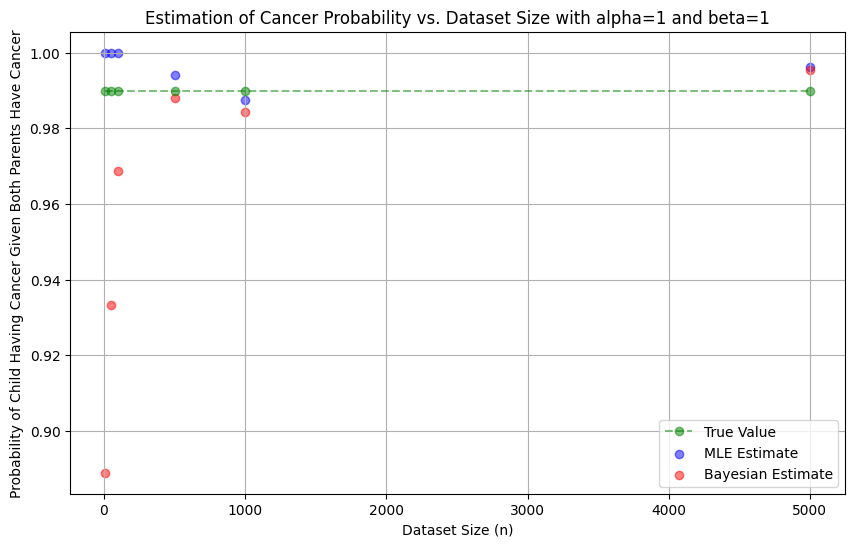

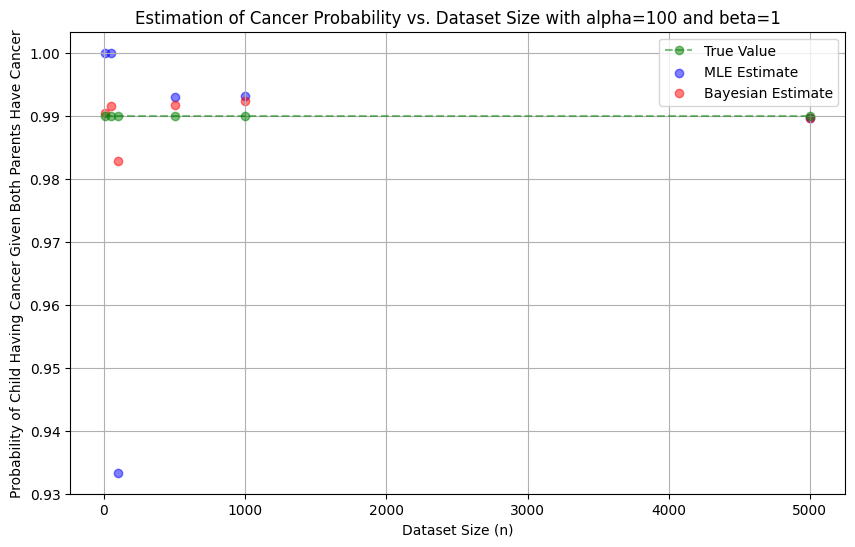

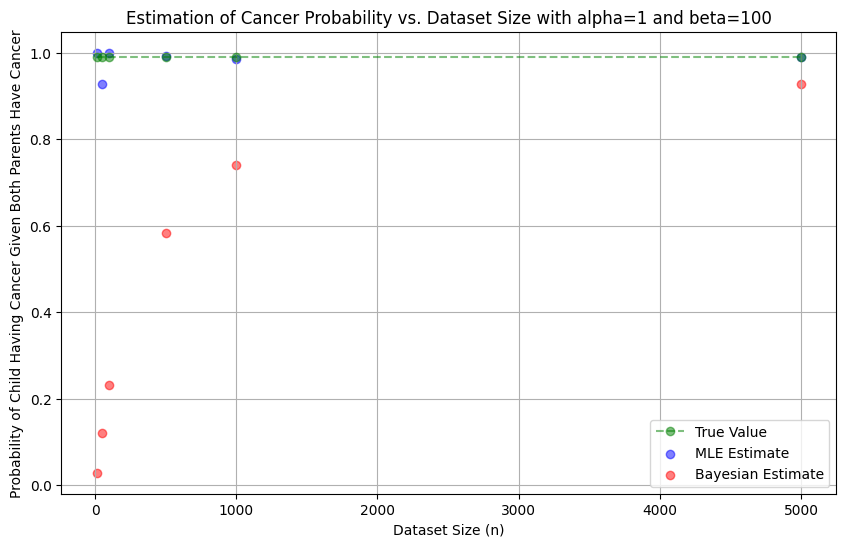

In [13]:
# But who is right or wrong? When should I use MLE vs. Bayesian Learning?? 

# As you can see, our choice to use MLE vs. Bayesian Learning should be based on whether or not we want to learn strictly from the data (if we have lots of data we can trust that... this is a "frequentist" point of view) or, if we have some "prior" intuition we want to encode into the problem ("going bayesian").
# Intuitively we can probably guess that if both of your parents have cancer, the probability that you will have cancer is pretty high right? So higher than 0% for sure right?
# Maybe I subjectively believe that its really high, like 99%, so I will guess that the true_cancer_probability_given_both_parents_have_cancer is close to 1, so I will use a Beta(100, 1). (go here to plot the Beta to gain intuition https://homepage.stat.uiowa.edu/~mbognar/applets/beta.html
# But maybe you believe the opposite! And you think its close to 0 still.. and we should use a Beta(1,100) prior. 
# Who is right? The frequentist (mle), bayesian me (with Beta(100,1), or bayesian you (with Beta(1,100)?

# NOTE: in this example our "true" true_cancer_probability_given_both_parents_have_cancer is 0.99 as per the dataset generation. But go ahead and play with this if you'd like. 

# Below we observe different sizes of datasets and how close our estimate is compared to the "true" distribution. 

# True parameters
true_cancer_probability_given_both_parents_have_cancer = 0.99
true_cancer_probability_given_one_parent_has_cancer = 0.6
true_cancer_probability_given_no_parent_has_cancer = 0.01
true_prior_on_cancer = 0.5

# Dataset sizes to test
n_list = [10, 50, 100, 500, 1000, 5000]

# Lists to store estimates


beta_distributions = [(1,1), (100,1), (1,100)]

for (a0,b0) in beta_distributions:
    # Prior parameters for Bayesian estimation (Beta distribution)
    n_values = []
    mle_estimates = []
    bayes_estimates = []
    for n in n_list:
        # Generate data
        df = create_data_set(
            num_families=n,
            true_cancer_probability_given_both_parents_have_cancer=true_cancer_probability_given_both_parents_have_cancer,
            true_cancer_probability_given_one_parent_has_cancer=true_cancer_probability_given_one_parent_has_cancer,
            true_cancer_probability_given_no_parent_has_cancer=true_cancer_probability_given_no_parent_has_cancer,
            true_prior_on_cancer=true_prior_on_cancer
        )
        
        # Filter data where both parents have cancer
        both_parents_have_cancer = df[(df['Mom'] == 1) & (df['Dad'] == 1)]
        total_trials = len(both_parents_have_cancer)
        
        if total_trials > 0:
            successes = both_parents_have_cancer['Child1'].sum()  # Number of children with cancer
            failures = total_trials - successes
            
            # MLE estimate
            mle_estimate = successes / total_trials
            
            # Bayesian estimate
            a_post = a0 + successes
            b_post = b0 + failures
            bayes_estimate = a_post / (a_post + b_post)
            
            n_values.append(n)
            mle_estimates.append(mle_estimate)
            bayes_estimates.append(bayes_estimate)
        else:
            print(f"For n = {n}, no instances where both parents have cancer. Skipping this dataset size.")
    # Plotting the estimates
    plt.figure(figsize=(10, 6))
    
    # Plot the true value
    plt.plot(n_values, [true_cancer_probability_given_both_parents_have_cancer] * len(n_values),
             label='True Value', marker='o', linestyle='--', color='green', alpha=0.5)
    
    # Plot the MLE estimates
    plt.scatter(n_values, mle_estimates, label='MLE Estimate', marker='o', linestyle='-', color='blue', alpha=0.5)
    
    # Plot the Bayesian estimates
    plt.scatter(n_values, bayes_estimates, label='Bayesian Estimate', marker='o', linestyle='-', color='red', alpha=0.5)
    
    plt.xlabel('Dataset Size (n)')
    plt.ylabel('Probability of Child Having Cancer Given Both Parents Have Cancer')
    plt.title(f'Estimation of Cancer Probability vs. Dataset Size with alpha={a0} and beta={b0}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [14]:
# Now lets discuss each of these 3 plots. 

# The first we see that the MLE was way closer than the Beta(1,1) in the beginning. Imposing our prior was not helpful because it was way off. But in the end at n=5000 both approach the right probability. 

# Second, the Beta(100,1) was much closer than the MLE estimate. This is because my prior was right on the money! But with n=5000, both approaches end up the same and very close.

# Last, the Beta(1,100) was way off, so it actually hurt us compared to the MLE estimate. This is because your prior was way wrong. Even with n=5000, we are still not erasing the impact of such a heavy prior. 

# So what is the lesson? If you have huge n and not much of a prior belief or intuition, just use MLE. Otherwise, use a bayesian estimate. 



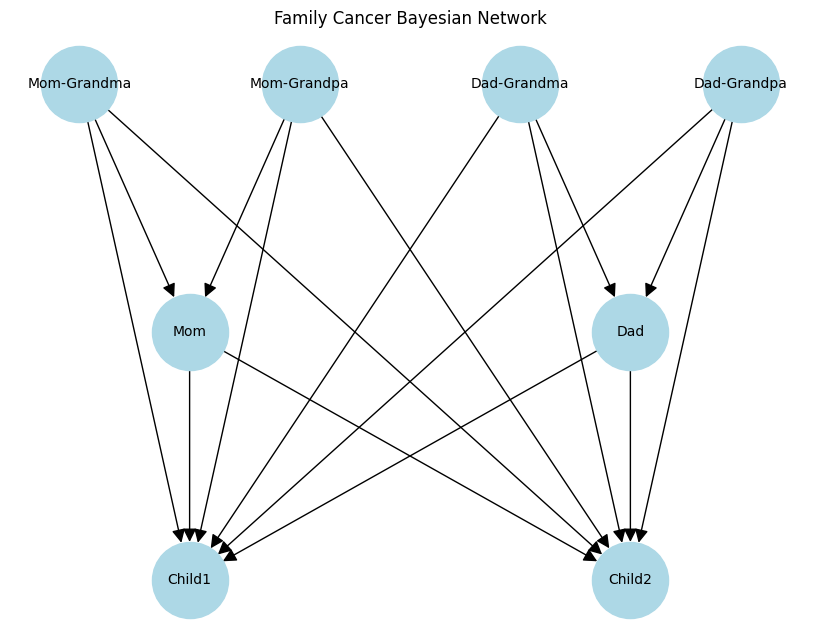

In [20]:
# 5. Structure Learning 

# Now lets say we read a paper by a famous doctor who believes there may be some crazy gene expression that causes all cancers, but this gene appears to "skip a generation" (it's typically referred to as a recessive inheritance pattern) 
# And so, us datascientists, want to let the data tell us if this is more likely or not. 
# How can we let the data tell us which graph is more likely given enough data? 
# Well, we could model this by adding an edge from the grandparents to the children directly! 
# And then we can compute the likelihood of that graph (G2) vs. the original graph we had above (G). 

# First, lets visualize G2 so you can see what I am talking about. 

import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G2 = nx.DiGraph()

# Add nodes for grandparents, parents, and children
nodes = [
    'Mom-Grandma', 'Mom-Grandpa', 'Dad-Grandma', 'Dad-Grandpa',
    'Mom', 'Dad', 'Child1', 'Child2'
]
G2.add_nodes_from(nodes)

# Add edges from grandparents to parents
G2.add_edges_from([
    ('Mom-Grandma', 'Mom'), ('Mom-Grandpa', 'Mom'),
    ('Dad-Grandma', 'Dad'), ('Dad-Grandpa', 'Dad')
])

# Add edges from parents to children
G2.add_edges_from([
    ('Mom', 'Child1'), ('Mom', 'Child2'),
    ('Dad', 'Child1'), ('Dad', 'Child2')
])

# Add edges directly from grandparents to children
G2.add_edges_from([
    ('Mom-Grandma', 'Child1'), ('Mom-Grandma', 'Child2'),
    ('Mom-Grandpa', 'Child1'), ('Mom-Grandpa', 'Child2'),
    ('Dad-Grandma', 'Child1'), ('Dad-Grandma', 'Child2'),
    ('Dad-Grandpa', 'Child1'), ('Dad-Grandpa', 'Child2')
])

# Define the positions of the nodes
pos = {
    'Mom-Grandma': (1, 3),
    'Mom-Grandpa': (3, 3),
    'Dad-Grandma': (5, 3),
    'Dad-Grandpa': (7, 3),
    'Mom': (2, 2),
    'Dad': (6, 2),
    'Child1': (2, 1),
    'Child2': (6, 1),
}

model_G2 = BayesianNetwork(list(G2.edges()))

model_G2.add_cpds(cpd_MG, cpd_MP, cpd_DG, cpd_DP, cpd_M, cpd_D, cpd_C1, cpd_C2)

# Draw the graph with arrows from grandparents to children
plt.figure(figsize=(8, 6))
nx.draw(
    G2, pos, with_labels=True, node_size=3000, node_color='lightblue',
    arrowsize=20, font_size=10, font_color='black'
)
plt.title("Family Cancer Bayesian Network")
plt.show()


In [21]:
# Now lets calculate the Bayesian Score of G2 and G1 and lets see given the data which is more probable. 

# We will use the Bayesian Information Criterion (BIC) (BIC=log(P(data∣model)) − (k/2)log(n)) as an approximation for the Bayesian score.
from pgmpy.estimators import BicScore

# Calculate BIC Scores
bic = BicScore(df)
score_G1 = bic.score(model)
score_G2 = bic.score(model_G2)

print(f"BIC Score of G1: {score_G1}")
print(f"BIC Score of G2: {score_G2}")

# Compare the scores
if score_G1 > score_G2:
    print("G1 is more probable.")
else:
    print("G2 is more probable.")

BIC Score of G1: -21238.55236189877
BIC Score of G2: -21695.190708234622
G1 is more probable.


  0%|          | 0/1000000 [00:00<?, ?it/s]

Estimated Graph Structure:
[('Mom-Grandma', 'Mom-Grandpa'), ('Dad-Grandpa', 'Dad-Grandma'), ('Mom', 'Mom-Grandma'), ('Mom', 'Mom-Grandpa'), ('Mom', 'Child2'), ('Mom', 'Dad'), ('Dad', 'Dad-Grandpa'), ('Dad', 'Dad-Grandma'), ('Dad', 'Child2'), ('Child1', 'Mom'), ('Child1', 'Dad')]


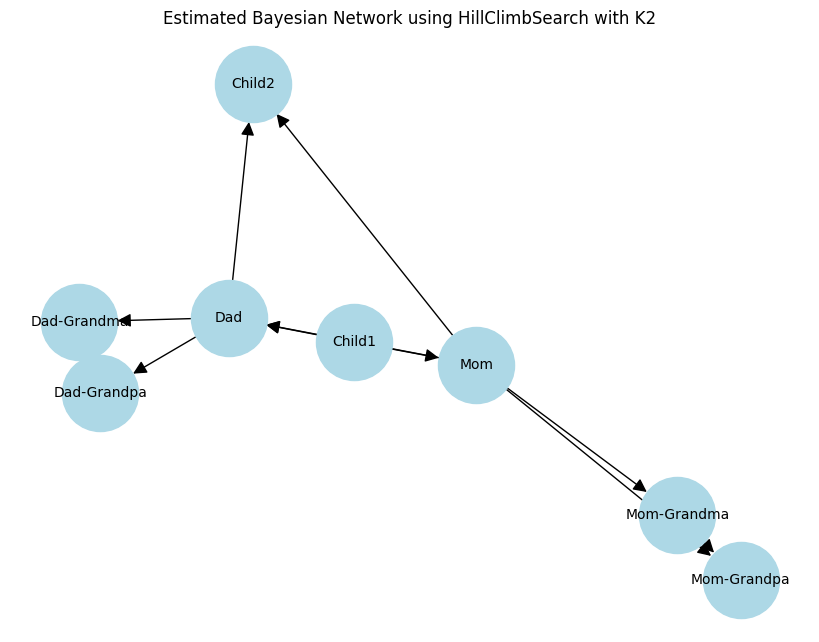

In [26]:
# So now we have answered the question! Granted we generated the data so we already knew that to be true, BUT if we didn't know we do know! So we can tell everyone that the doctor was wrong! It is more likely that there does not exist such a recessive inheritance pattern! 

# Lets take this to the next level! Lets say we want to let the data TELL us what the structure of the graph is.. vs. us taking guesses at it where the edges lie. 

# Maybe there is some strange dependence between the parents! Where if one parent gets cancern, its likely that the other does! Perhaps because one parent smokes only around the other parent but never in front of the children. The data will tell us this likely graph! 

# But just like before it all depends on our priors and the size of n for how accurate our graph estimate is. 

from pgmpy.estimators import K2Score, HillClimbSearch

# Dataset sizes to test
n=5000
df = create_data_set(num_families=n)

# Use HillClimbSearch to estimate the most probable graph
hc = HillClimbSearch(df)
estimated_model = hc.estimate(scoring_method='k2score', )

# Print the edges of the estimated model
print("Estimated Graph Structure:")
print(estimated_model.edges())

# Visualize the estimated graph using networkx
G_estimated = nx.DiGraph(estimated_model.edges())
pos = nx.spring_layout(G_estimated, seed=42)

plt.figure(figsize=(8, 6))
nx.draw(
    G_estimated, pos, with_labels=True, node_size=3000, node_color='lightblue',
    arrowsize=20, font_size=10, font_color='black'
)
plt.title("Estimated Bayesian Network using HillClimbSearch with K2")
plt.show()


In [ ]:
# 6. Simple Decisions

# Now lets assume that you are a doctor, and you have the unfortunate responsibility to determine if the person should get Chemo or not. 
# Chemo is a cancer treatment that uses drugs to kill cancer cells, stop them from spreading, or slow their growth, but they also kill healthy cells and cause the person to be very sick. So if the person does not have cancer, we do not want to give Chemo. 
# If the patient has a high probability of having cancer, this may be their best option. 

# So lets use our knowledge of Decision Graphs and Maximum Expected Utility to determine the right outcome given this patients specific likelihood of cancer. 